In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [172]:
data = pd.read_csv('../day5/data/day5_assign_machine_failure_dataset.csv')
data.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [173]:
data.isnull().any()

Temperature     False
Vibration       False
Power_Usage     False
Humidity        False
Machine_Type    False
Failure_Risk    False
dtype: bool

In [174]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

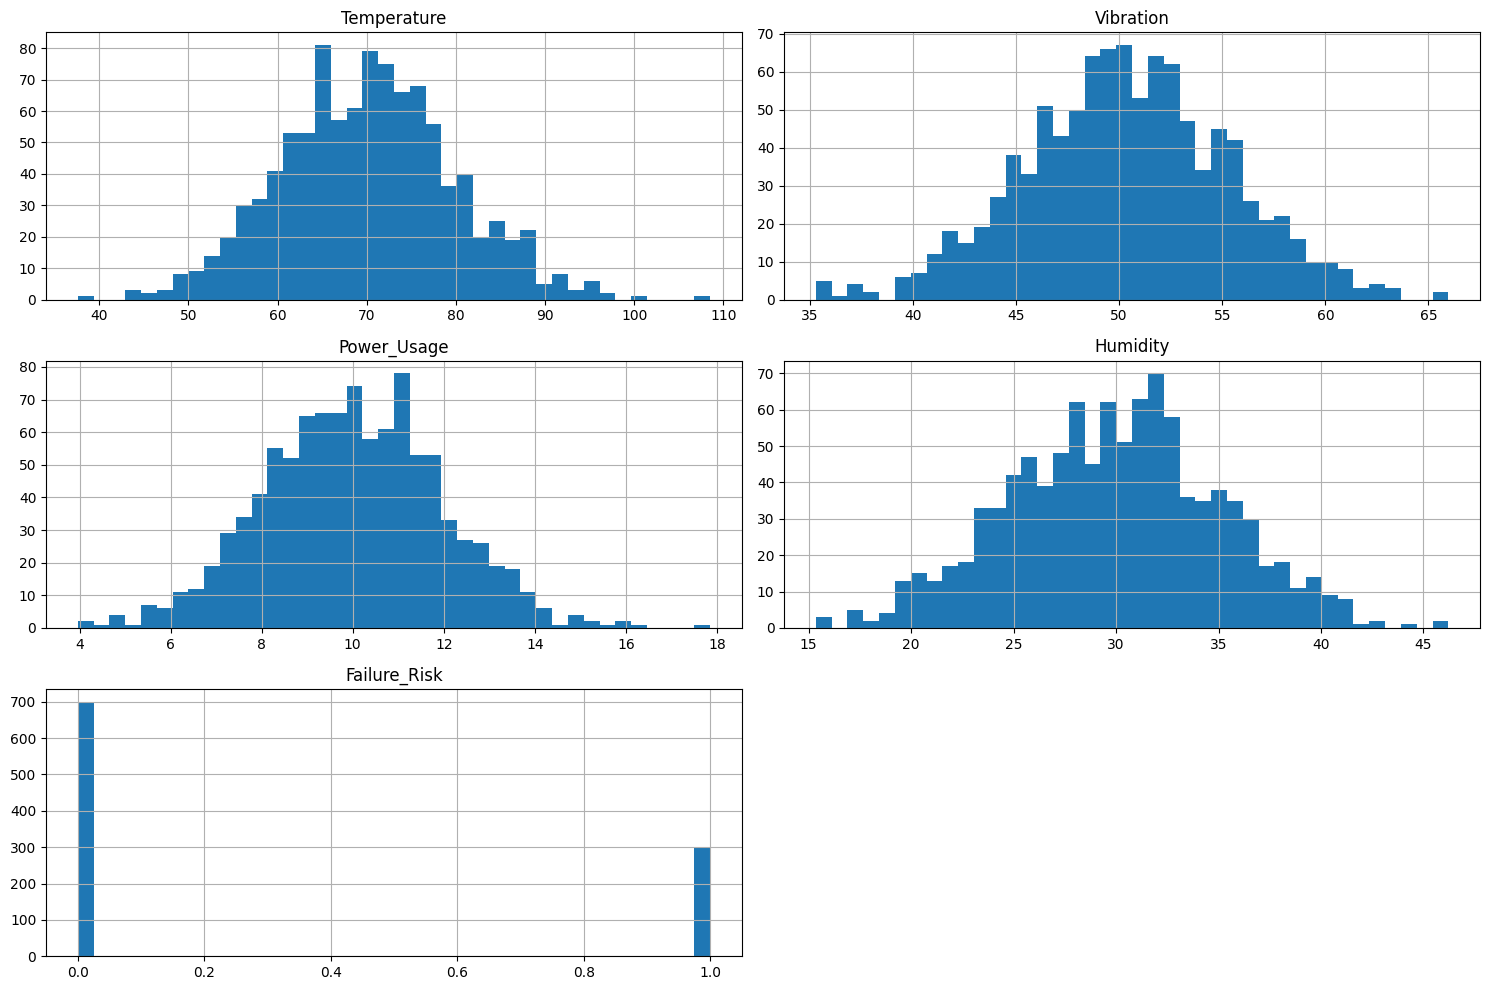

In [175]:
import seaborn as sns
data.hist(bins=40, figsize=(15,10))
plt.tight_layout()

In [176]:
X = data.drop('Failure_Risk', axis=1)
y = data['Failure_Risk']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
num_features = ['Temperature',	'Vibration',	'Power_Usage',	'Humidity']
cat_features = ['Machine_Type']

In [187]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OneHotEncoder())
])

In [188]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, num_features),
        ('cat',categorical_transformer, cat_features)
    ]
)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        # ('logistic',LogisticRegression())])
                        ('knn', KNeighborsClassifier(16))])
                        # ('svc', SVC(kernel='sigmoid', gamma=0.1, C=1))])

In [189]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Vibration',
                                                   'Power_Usage', 'Humidity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OneHotEncoder())]),
                                                  ['Machine_Type'])])),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [190]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import binarize
y_pred_test = model.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred_test)
print(c_matrix)


[[133   2]
 [ 61   4]]


In [191]:
err = (c_matrix[0, 1] + c_matrix[1, 0]) / y_test.count()
print('Error Rate', '{:.2f}'.format(err))
print(classification_report(y_test, y_pred_test))

Error Rate 0.32
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       135
           1       0.67      0.06      0.11        65

    accuracy                           0.69       200
   macro avg       0.68      0.52      0.46       200
weighted avg       0.68      0.69      0.58       200



In [154]:
auc_score = roc_auc_score(y_test, y_pred_test)
print(auc_score)

0.49686609686609684
